# Conclusions from following tests:

# Best preprocessing

### Countries per region
new_countries = {
    "United-States": [' United-States'],
    "South-East-Asia": [' Philippines', ' Cambodia' ,' Laos', ' Vietnam', ' Thailand'],
    "North-America": [' Canada'],
    "Mexico": [' Mexico'],
    "Central-South-America": [' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador',
                              ' El-Salvador', ' Guatemala', ' Honduras', ' Jamaica', ' Peru',
                              ' Puerto-Rico', ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)',
                              ' Haiti', ' Nicaragua'],
    "Western-Europe": [' England', ' France', ' Germany', ' Holand-Netherlands',
                       ' Ireland', ' Scotland', ' Italy', ' Portugal'],
    "Eastern-Europe": [' Hungary', ' Greece', ' Yugoslavia', ' Poland'],
    "Asia": [' China', ' Hong', ' Japan', ' Taiwan'],
    "India": [' India'],
    "Iran": [' Iran'],
    "South": [' South'],
}

for k, v in new_countries.items():

    X_train['native-country'] = X_train['native-country'].replace(v, k)

    X_test['native-country'] = X_test['native-country'].replace(v, k)

### Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])

X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

### Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)

X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)

X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)

X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

### Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)

X_test = X_test.drop(['education'], axis=1)

X_train['relationship'] = X_train['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')

X_test['relationship'] = X_test['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')

### One-hot-encoding
X_train = pd.get_dummies(X_train)

X_test = pd.get_dummies(X_test)


# Imports and data loading

In [362]:
# Imports
import numpy as np
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from matplotlib import cm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest

# 1. Simple one-hot-encoding
Result f1-score macro avg: **78.91027339567878 ± 1.201072222433666**

In [73]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

(24421, 13) (24421, 13)
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [77]:
# Preprocessing
# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_test = X_test.drop('native-country_ Holand-Netherlands', axis=1)

In [80]:
# Model
base_model = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_base = cross_val_score(base_model, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_base.mean(), cv_score_base.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.786, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] .................................... , score=0.813, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.2min remaining:    0.0s


[CV] .................................... , score=0.781, total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.9min remaining:    0.0s


[CV] .................................... , score=0.784, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.5min remaining:    0.0s


[CV] .................................... , score=0.782, total= 1.6min
0.7891027339567878 0.01201072222433666


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.1min finished


# 2. Droping missing values

no nan values, ' ?' instead

only for workclass, occupation and native-country

if workclass ' ?' => occupation also ' ?', so cannot infer missing workclass from occupation

we can either keep those missing values and consider them as an extra 'unknown' class or drop them.

Result f1-score macro avg: **78.90124768713636 ± 1.1502992889004082** -> Light decrease

In [87]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

(24421, 13) (24421, 13)
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [88]:
# Preprocessing
# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_test = X_test.drop('native-country_ Holand-Netherlands', axis=1)

(22633, 14) (22633, 13) (22589, 13)


In [90]:
model_dropna = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_dropna = cross_val_score(model_dropna, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_dropna.mean(), cv_score_dropna.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.786, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV] .................................... , score=0.812, total= 1.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.8min remaining:    0.0s


[CV] .................................... , score=0.784, total= 1.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.2min remaining:    0.0s


[CV] .................................... , score=0.784, total= 1.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.7min remaining:    0.0s


[CV] .................................... , score=0.780, total= 1.4min
0.7890124768713636 0.011502992889004082


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.1min finished


# 3. Countries

## 3.1. US vs NON-US

Result f1-score macro avg: **78.86040427465172 ± 1.1906568575666644**

In [160]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [161]:
# Preprocessing
# US vs NON US
X_train['native-country'][X_train['native-country'] != ' United-States'] = 'Non-United-States'
X_test['native-country'][X_test['native-country'] != ' United-States'] = 'Non-United-States'

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [97]:
model_usnonus = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_usnonus = cross_val_score(model_usnonus, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_usnonus.mean(), cv_score_usnonus.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.782, total= 1.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] .................................... , score=0.812, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.8min remaining:    0.0s


[CV] .................................... , score=0.781, total= 1.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.1min remaining:    0.0s


[CV] .................................... , score=0.786, total= 1.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.3min remaining:    0.0s


[CV] .................................... , score=0.782, total= 1.3min
0.7886040427465172 0.011906568575666644


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.6min finished


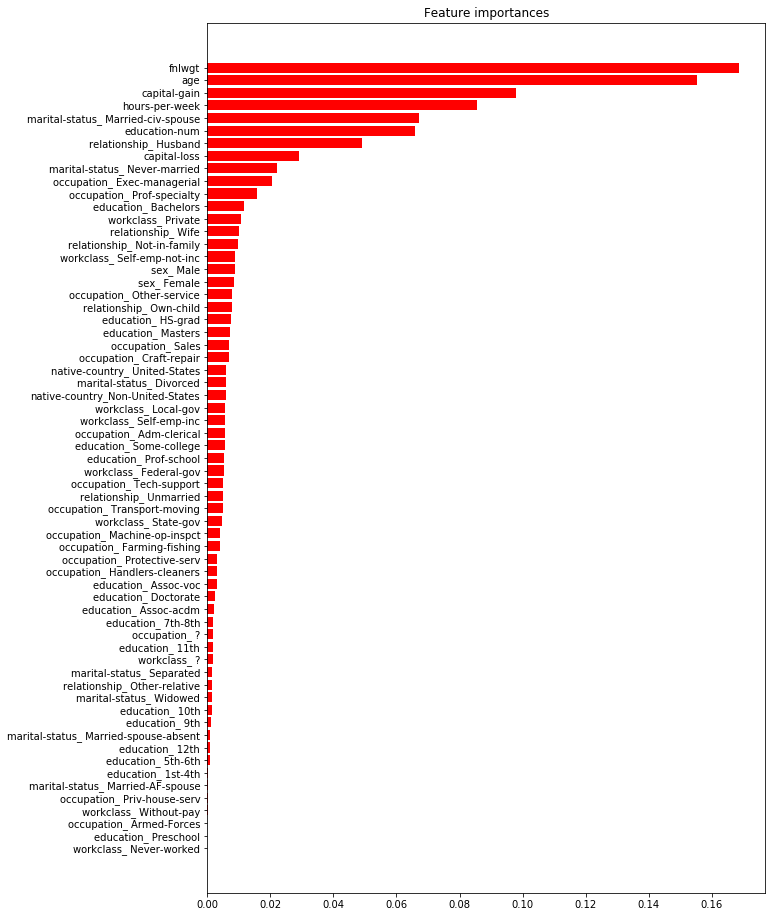

In [162]:
model_usnonus.fit(X_train, y_train)
importances = model_usnonus.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

## 3.2. Native country per world region

Result f1-score macro avg: **79.02194128802463 ± 1.1215107729782264**

In [156]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

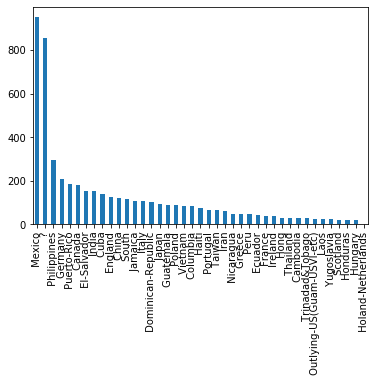

In [135]:
countries_distrib = pd.concat([X_train["native-country"], X_test["native-country"]], axis=0)
countries_distrib[countries_distrib != ' United-States'].value_counts().plot(kind='bar')

In [149]:
countries = {
    "United-States": [' United-States'],
    "South-East-Asia": [' Philippines', ' Cambodia' ,' Laos', ' Vietnam', ' Thailand'],
    "North-America": [' Canada'],
    "Mexico": [' Mexico'],
    "Central-South-America": [' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador',
                              ' El-Salvador', ' Guatemala', ' Honduras', ' Jamaica', ' Peru',
                              ' Puerto-Rico', ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)',
                              ' Haiti', ' Nicaragua'],
    "Western-Europe": [' England', ' France', ' Germany', ' Holand-Netherlands', ' Ireland', ' Scotland'],
    "Eastern-Europe": [' Hungary', ' Greece', ' Yugoslavia', ' Poland'],
    "South-Europe": [' Italy', ' Portugal'],
    "Asia": [' China', ' Hong', ' Japan', ' Taiwan'],
    "India": [' India'],
    "Iran": [' Iran'],
    "South": [' South'],
}

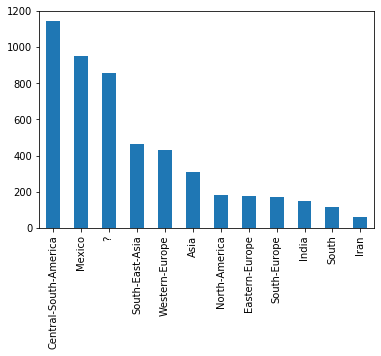

In [157]:
# Preprocessing
# Countries per region
for k, v in countries.items():
    X_train['native-country'] = X_train['native-country'].replace(v, k)
    X_test['native-country'] = X_test['native-country'].replace(v, k)

countries_distrib = pd.concat([X_train["native-country"], X_test["native-country"]], axis=0)
countries_distrib[countries_distrib != 'United-States'].value_counts().plot(kind='bar')
    
# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [152]:
model_countriesregions = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_countriesregions = cross_val_score(model_countriesregions, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions.mean(), cv_score_countriesregions.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.786, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] .................................... , score=0.812, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s


[CV] .................................... , score=0.784, total= 1.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.3min remaining:    0.0s


[CV] .................................... , score=0.787, total= 1.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.7min remaining:    0.0s


[CV] .................................... , score=0.782, total= 1.5min
0.7902194128802463 0.011215107729782264


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.2min finished


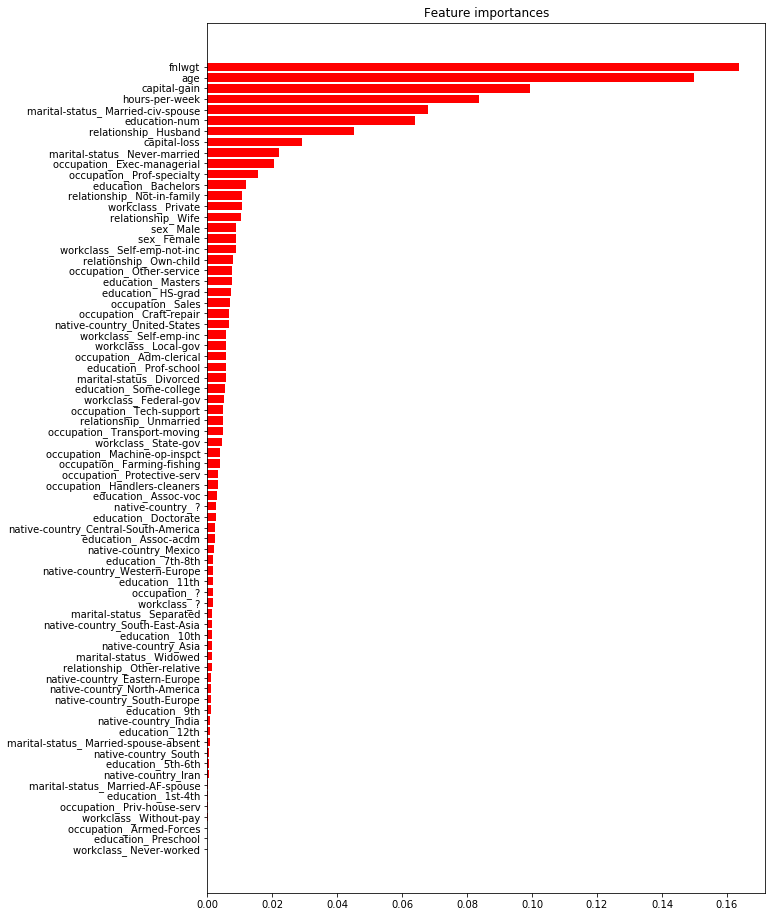

In [159]:
model_countriesregions.fit(X_train, y_train)
importances = model_countriesregions.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

##  3.3. New countries

**79.27027563899722 ± 1.1899513756445183**

In [263]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [264]:
# Preprocessing

new_countries = {
    "United-States": [' United-States'],
    "South-East-Asia": [' Philippines', ' Cambodia' ,' Laos', ' Vietnam', ' Thailand'],
    "North-America": [' Canada'],
    "Mexico": [' Mexico'],
    "Central-South-America": [' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador',
                              ' El-Salvador', ' Guatemala', ' Honduras', ' Jamaica', ' Peru',
                              ' Puerto-Rico', ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)',
                              ' Haiti', ' Nicaragua'],
    "Western-Europe": [' England', ' France', ' Germany', ' Holand-Netherlands',
                       ' Ireland', ' Scotland', ' Italy', ' Portugal'],
    "Eastern-Europe": [' Hungary', ' Greece', ' Yugoslavia', ' Poland'],
    "Asia": [' China', ' Hong', ' Japan', ' Taiwan'],
    "India": [' India'],
    "Iran": [' Iran'],
    "South": [' South'],
}

# Countries per region
for k, v in new_countries.items():
    X_train['native-country'] = X_train['native-country'].replace(v, k)
    X_test['native-country'] = X_test['native-country'].replace(v, k)

# Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

X_train['relationship'] = X_train['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')
X_test['relationship'] = X_test['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [260]:
model_newcountriesregions_fnlwgt_capital_education_spouse = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_newcountriesregions_fnlwgt_capital_education_spouse = cross_val_score(model_newcountriesregions_fnlwgt_capital_education_spouse, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_newcountriesregions_fnlwgt_capital_education_spouse.mean(), cv_score_newcountriesregions_fnlwgt_capital_education_spouse.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.788, total= 1.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] .................................... , score=0.816, total= 1.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.8min remaining:    0.0s


[CV] .................................... , score=0.791, total= 2.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.8min remaining:    0.0s


[CV] .................................... , score=0.784, total= 1.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.1min remaining:    0.0s


[CV] .................................... , score=0.784, total= 1.5min
0.7927027563899722 0.011899513756445183


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.6min finished


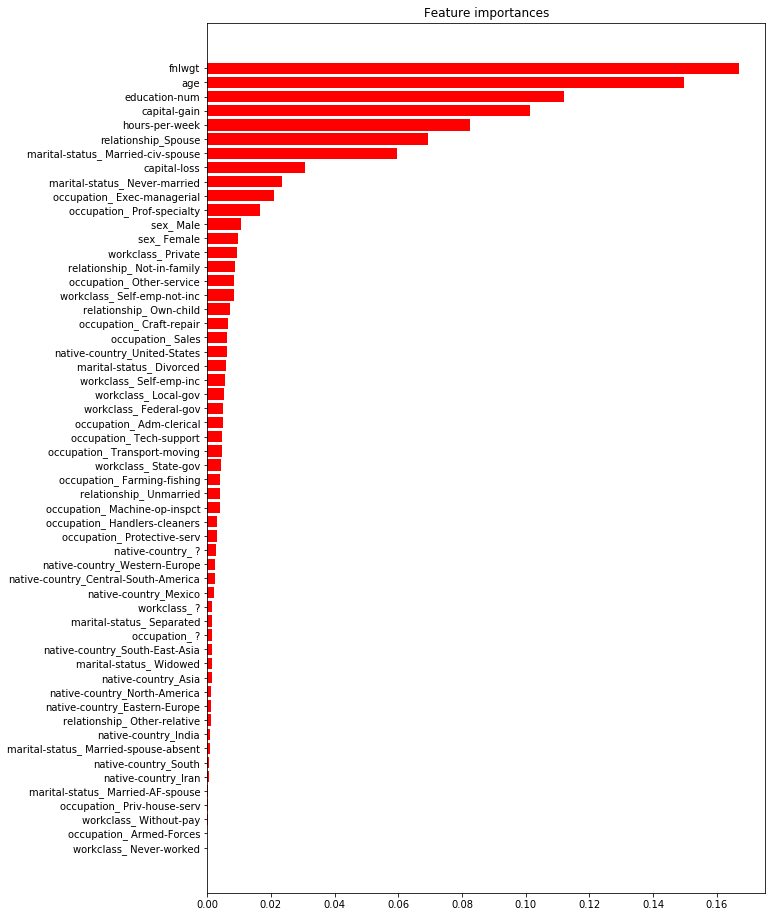

In [265]:
model_newcountriesregions_fnlwgt_capital_education_spouse.fit(X_train, y_train)
importances = model_newcountriesregions_fnlwgt_capital_education_spouse.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

# 3.4 Clustering countries

In [282]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [283]:
# Preprocessing

# Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

X_train['relationship'] = X_train['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')
X_test['relationship'] = X_test['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')

X_train = X_train.drop("native-country", axis=1)
X_test = X_test.drop("native-country", axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


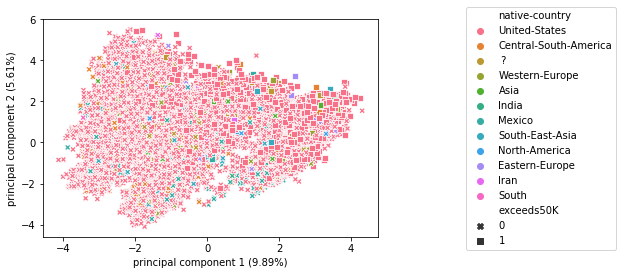

In [284]:
X_train_norm = StandardScaler().fit_transform(X_train)  # standadize before PCA

pca = PCA(n_components=2, random_state=0)
pca.fit(X_train_norm)
principalComponents = pca.transform(X_train_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                                                                  'principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100)])

# Countries per region
for k, v in new_countries.items():
    train['native-country'] = train['native-country'].replace(v, k)

finalDf = pd.concat([principalDf, train["exceeds50K"], train['native-country']], axis = 1)
finalDf = finalDf[finalDflDf['native-country'] != 'United-States']

markers = {0: "X", 1: "s"}


plt.figure()
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    style="exceeds50K", markers=markers, hue="native-country", data=finalDf,legend="full", palette="Set2")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

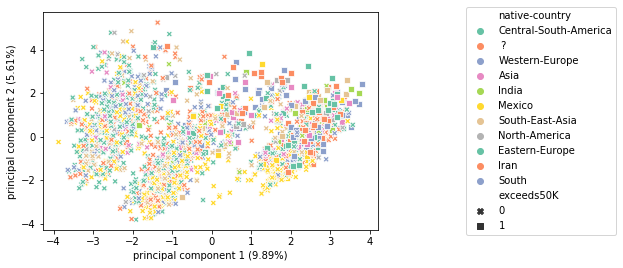

In [287]:
finalDf = finalDf[finalDf['native-country'] != 'United-States']


plt.figure()
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    style="exceeds50K", markers=markers, hue="native-country", data=finalDf,legend="full", palette="Set2")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# 4. Age to age-bin -> bin of 5 years

0.7853834608264233 0.01008323053065639

In [167]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [168]:
bins = np.arange(15, 95, 5)
X_train["age-bin"] = pd.cut(X_train["age"], bins=bins, include_lowest=True)
train["age-bin"] = pd.cut(train["age"], bins=bins, include_lowest=True)
X_test["age-bin"] = pd.cut(X_test["age"], bins=bins, include_lowest=True)

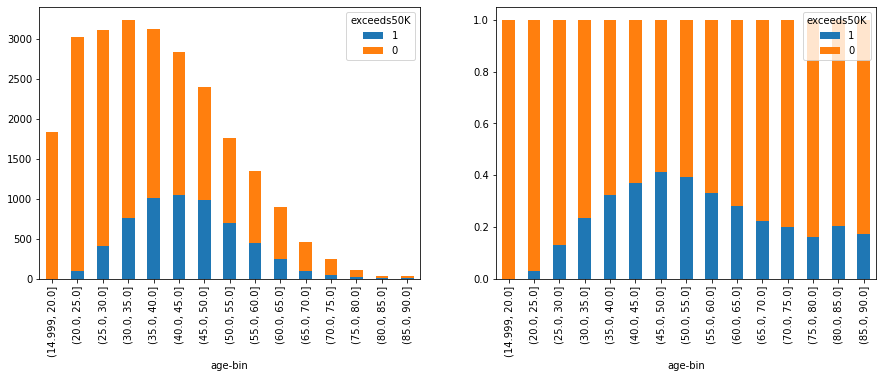

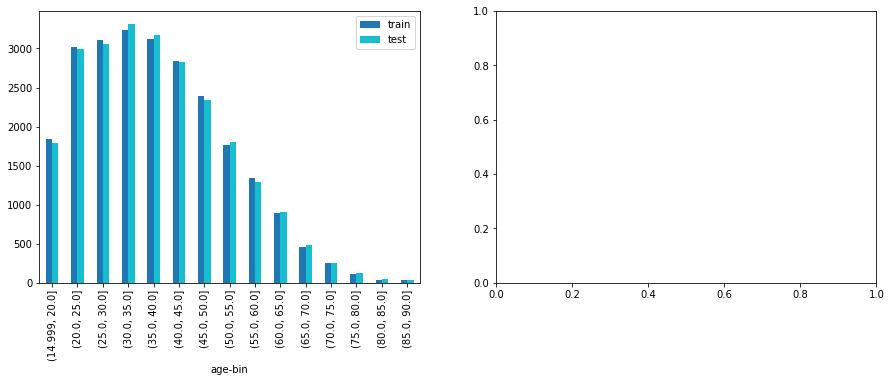

In [165]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
df_plot = train.groupby(['age-bin', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='age-bin', values=0).sort_index(ascending=False, axis=1)
df_plot.plot(kind='bar', stacked=True, ax=axs[0])
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)
df_plot.plot(kind='bar', stacked=True, ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(15,5))
df_plot = pd.concat([X_train.groupby(['age-bin']).size(), X_test.groupby(['age-bin']).size()], axis=1)
df_plot.columns = ["train", "test"]
df_plot.plot(kind='bar', ax=axs[0], cmap=cm.get_cmap('tab10'))

In [169]:
# Preprocessing
# Age bin
X_train = X_train.drop(['age'], axis=1)
X_test = X_test.drop(['age'], axis=1)

# Countries per region
for k, v in countries.items():
    X_train['native-country'] = X_train['native-country'].replace(v, k)
    X_test['native-country'] = X_test['native-country'].replace(v, k)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [170]:
model_countriesregions_agebin = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_countriesregions_agebin = cross_val_score(model_countriesregions_agebin, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_agebin.mean(), cv_score_countriesregions_agebin.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.784, total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV] .................................... , score=0.804, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.2min remaining:    0.0s


[CV] .................................... , score=0.785, total=10.5min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 13.7min remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.778, total= 1.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 15.1min remaining:    0.0s


[CV] .................................... , score=0.776, total= 1.5min
0.7853834608264233 0.01008323053065639


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 16.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 16.6min finished


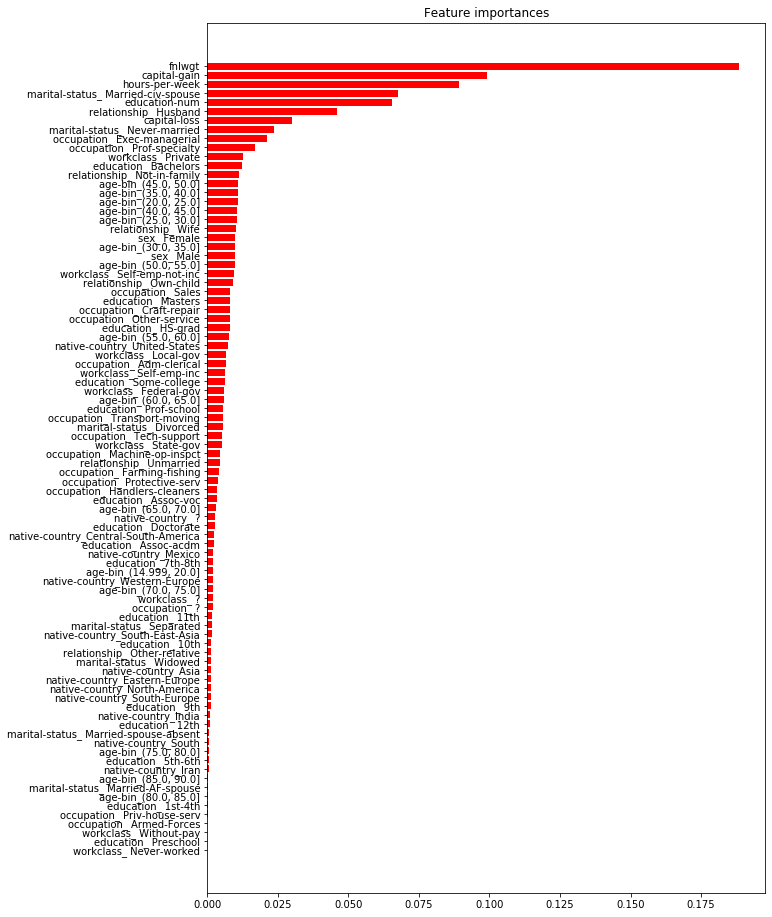

In [171]:
model_countriesregions_agebin.fit(X_train, y_train)
importances = model_countriesregions_agebin.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

# 5. Fnlwgt

**79.05185986667931 ± 1.0985187716965796**

In [187]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

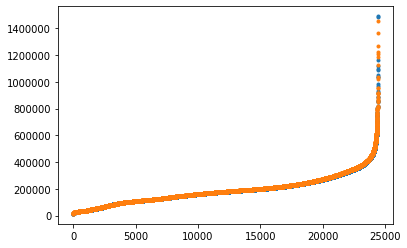

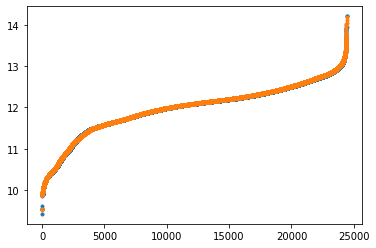

In [188]:
plt.plot(np.sort(X_train['fnlwgt'].values), '.')
plt.plot(np.sort(X_test['fnlwgt'].values), '.')

plt.figure()
plt.plot(np.sort(np.log(X_train['fnlwgt'].values)), '.')
plt.plot(np.sort(np.log(X_test['fnlwgt'].values)), '.')

In [189]:
# Preprocessing

# Countries per region
for k, v in countries.items():
    X_train['native-country'] = X_train['native-country'].replace(v, k)
    X_test['native-country'] = X_test['native-country'].replace(v, k)

# Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [190]:
model_countriesregions_agebin_fnlwgt = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_countriesregions_agebin_fnlwgt = cross_val_score(model_countriesregions_agebin_fnlwgt, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_agebin_fnlwgt.mean(), cv_score_countriesregions_agebin_fnlwgt.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.787, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] .................................... , score=0.812, total= 1.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s


[CV] .................................... , score=0.784, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.6min remaining:    0.0s


[CV] .................................... , score=0.787, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.1min remaining:    0.0s


[CV] .................................... , score=0.783, total= 1.5min
0.7905185986667931 0.010985187716965796


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.6min finished


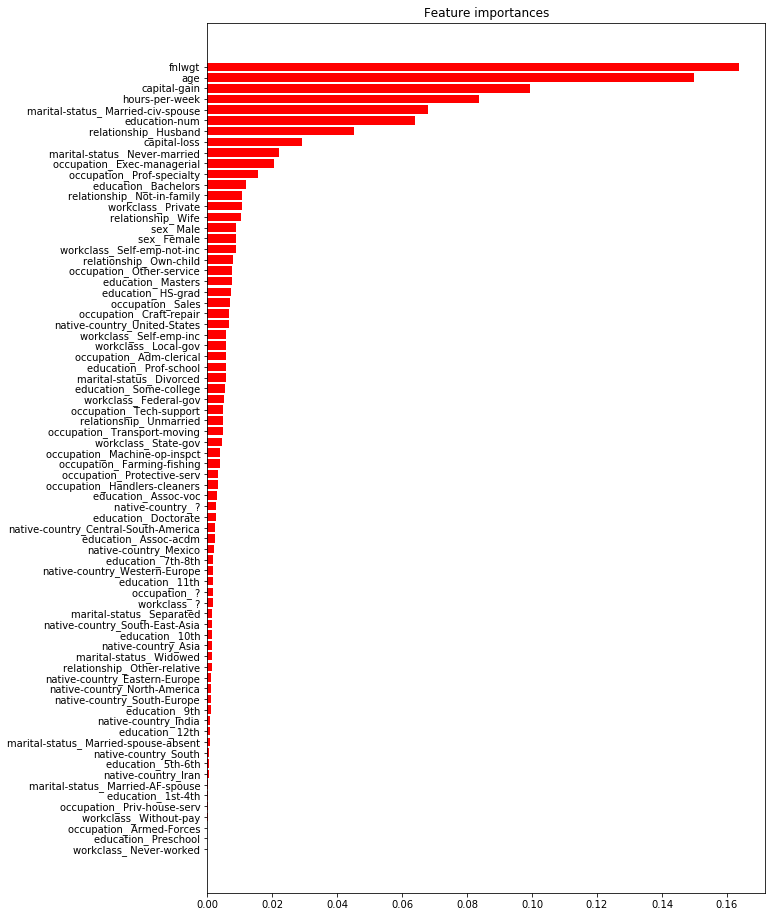

In [191]:
model_countriesregions_agebin_fnlwgt.fit(X_train, y_train)
importances = model_countriesregions_agebin_fnlwgt.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

# 6. Capital gain & Capital Loss

**79.07518245937164 ± 1.0954395720598559**

In [230]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/hanae/opt/anaconda3/l

-inf
-inf
-inf
-inf
count    24421.000000
mean         0.734740
std          2.457822
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.512915
Name: capital-gain, dtype: float64
count    24421.000000
mean         0.348782
std          1.580824
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.268732
Name: capital-loss, dtype: float64
count    24421.000000
mean         0.722308
std          2.432993
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.512915
Name: capital-gain, dtype: float64
count    24421.000000
mean         0.353111
std          1.591415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.379309
Name: capital-loss, dtype: float64


/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in log
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log


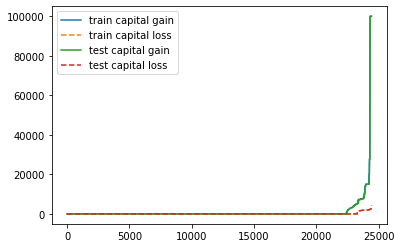

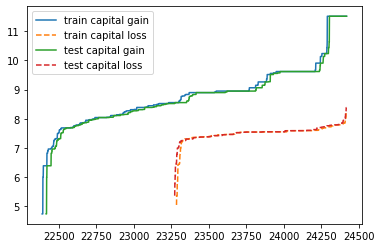

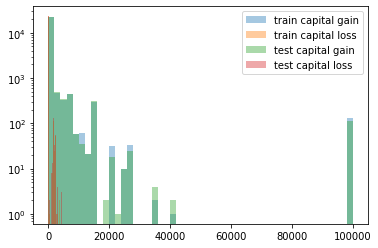

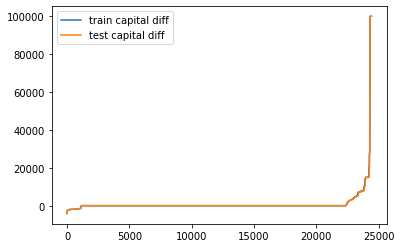

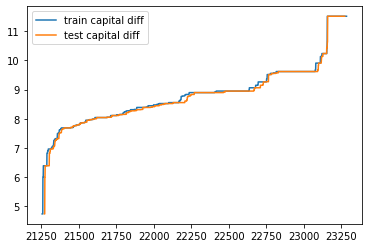

In [231]:
plt.plot(np.sort(X_train['capital-gain'].values), '-', label="train capital gain")
plt.plot(np.sort(X_train['capital-loss'].values), '--', label="train capital loss")
plt.plot(np.sort(X_test['capital-gain'].values), '-', label="test capital gain")
plt.plot(np.sort(X_test['capital-loss'].values), '--', label="test capital loss")
plt.legend()

plt.figure()
plt.plot(np.sort(np.log(X_train['capital-gain'].values)), '-', label="train capital gain")
plt.plot(np.sort(np.log(X_train['capital-loss'].values)), '--', label="train capital loss")
plt.plot(np.sort(np.log(X_test['capital-gain'].values)), '-', label="test capital gain")
plt.plot(np.sort(np.log(X_test['capital-loss'].values)), '--', label="test capital loss")
plt.legend()

print(min(np.log(X_train['capital-gain'].values)))
print(min(np.log(X_test['capital-loss'].values)))
print(min(np.log(X_train['capital-gain'].values)))
print(min(np.log(X_test['capital-loss'].values)))

print(np.log(X_train['capital-gain']).replace(-np.inf, 0).describe())
print(np.log(X_train['capital-loss']).replace(-np.inf, 0).describe())
print(np.log(X_test['capital-gain']).replace(-np.inf, 0).describe())
print(np.log(X_test['capital-loss']).replace(-np.inf, 0).describe())


plt.figure()
sns.distplot(X_train['capital-gain'].values, label="train capital gain", kde=False, hist_kws={'log':True})
sns.distplot(X_train['capital-loss'].values, label="train capital loss", kde=False, hist_kws={'log':True})
sns.distplot(X_test['capital-gain'].values,  label="test capital gain", kde=False, hist_kws={'log':True})
sns.distplot(X_test['capital-loss'].values, label="test capital loss", kde=False, hist_kws={'log':True})
plt.legend()

plt.figure()
plt.plot(np.sort(X_train['capital-gain'].values - X_train['capital-loss'].values), '-', label="train capital diff")
plt.plot(np.sort(X_test['capital-gain'].values - X_test['capital-loss'].values), '-', label="test capital diff")
plt.legend()

plt.figure()
plt.plot(np.sort(np.log(X_train['capital-gain'].values - X_train['capital-loss'].values)), '-', label="train capital diff")
plt.plot(np.sort(np.log(X_test['capital-gain'].values - X_test['capital-loss'].values)), '-', label="test capital diff")
plt.legend()

In [232]:
# Preprocessing

# Countries per region
for k, v in countries.items():
    X_train['native-country'] = X_train['native-country'].replace(v, k)
    X_test['native-country'] = X_test['native-country'].replace(v, k)

# Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [217]:
model_countriesregions_fnlwgt_capital = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_countriesregions_fnlwgt_capital = cross_val_score(model_countriesregions_fnlwgt_capital, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital.mean(), cv_score_countriesregions_fnlwgt_capital.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.787, total= 1.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV] .................................... , score=0.812, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.5min remaining:    0.0s


[CV] .................................... , score=0.784, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.0min remaining:    0.0s


[CV] .................................... , score=0.787, total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.8min remaining:    0.0s


[CV] .................................... , score=0.783, total= 1.7min
0.7907518245937164 0.010954395720598559


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.5min finished


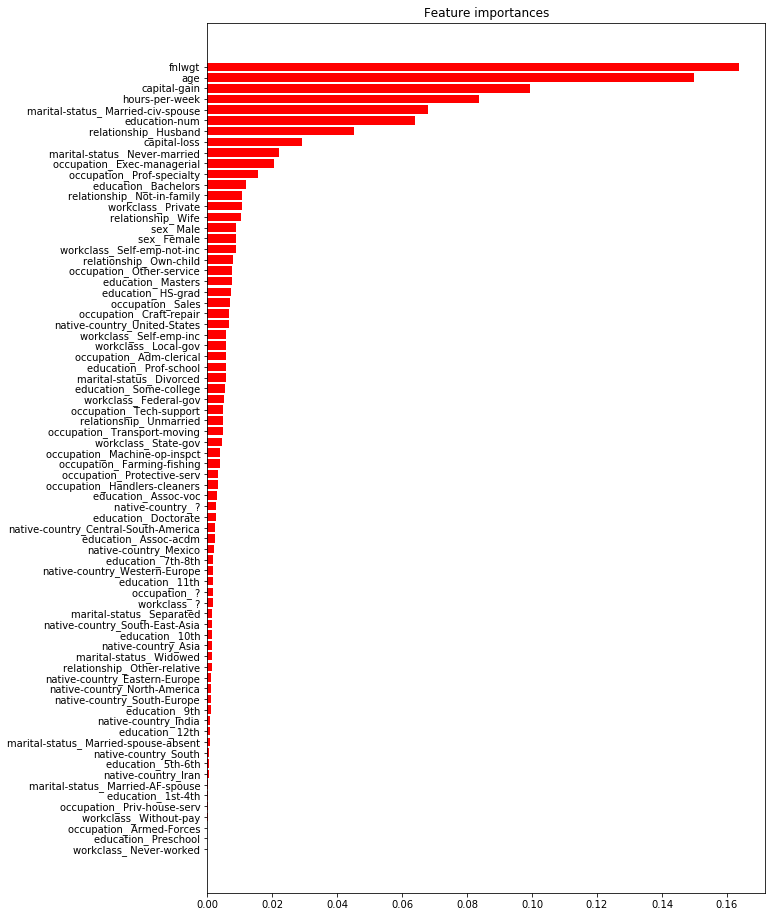

In [225]:
model_countriesregions_fnlwgt_capital.fit(X_train, y_train)
importances = model_countriesregions_fnlwgt_capital.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

# 7. Remove education, only education num

**79.11710522199877 ± 1.073315249690187**

In [234]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [235]:
# Preprocessing

# Countries per region
for k, v in countries.items():
    X_train['native-country'] = X_train['native-country'].replace(v, k)
    X_test['native-country'] = X_test['native-country'].replace(v, k)

# Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [236]:
model_countriesregions_fnlwgt_capital_education = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_countriesregions_fnlwgt_capital_education = cross_val_score(model_countriesregions_fnlwgt_capital_education, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital_education.mean(), cv_score_countriesregions_fnlwgt_capital_education.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.787, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV] .................................... , score=0.812, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.9min remaining:    0.0s


[CV] .................................... , score=0.787, total= 1.5min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.4min remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.787, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.9min remaining:    0.0s


[CV] .................................... , score=0.783, total= 1.6min
0.7911710522199877 0.01073315249690187


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.5min finished


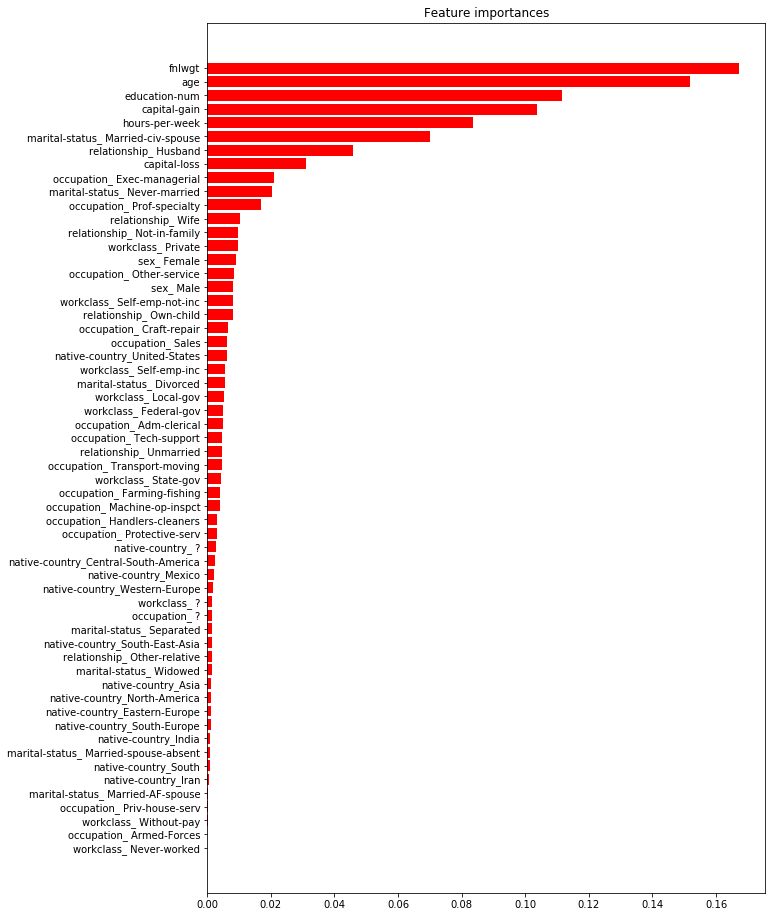

In [237]:
model_countriesregions_fnlwgt_capital_education.fit(X_train, y_train)
importances = model_countriesregions_fnlwgt_capital_education.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

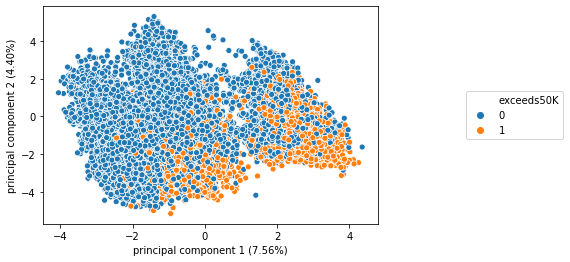

In [239]:
X_train_norm = StandardScaler().fit_transform(X_train)  # standadize before PCA

pca = PCA(n_components=2, random_state=0)
pca.fit(X_train_norm)
principalComponents = pca.transform(X_train_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                                                                  'principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100)])
finalDf = pd.concat([principalDf, train["exceeds50K"]], axis = 1)

markers = {0: "X", 1: "s"}

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    hue="exceeds50K", data=finalDf, legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# 8. Normalize

**79.10741815120177 ± 1.0726624391605238**

In [245]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [246]:
# Preprocessing

# Countries per region
for k, v in countries.items():
    X_train['native-country'] = X_train['native-country'].replace(v, k)
    X_test['native-country'] = X_test['native-country'].replace(v, k)

# Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# StandardScaler
col_names = ['fnlwgt', 'age', 'capital-gain', 'capital-loss', 'education-num', 'hours-per-week']
features = X_train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train[col_names] = features
features = X_test[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test[col_names] = features

In [249]:
model_countriesregions_fnlwgt_capital_education_norm = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_countriesregions_fnlwgt_capital_education_norm = cross_val_score(model_countriesregions_fnlwgt_capital_education_norm, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital_education_norm.mean(), cv_score_countriesregions_fnlwgt_capital_education_norm.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.786, total= 1.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] .................................... , score=0.812, total= 1.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.5min remaining:    0.0s


[CV] .................................... , score=0.787, total= 1.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.7min remaining:    0.0s


[CV] .................................... , score=0.787, total= 1.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.9min remaining:    0.0s


[CV] .................................... , score=0.784, total= 1.2min
0.7910741815120177 0.010726624391605238


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.1min finished


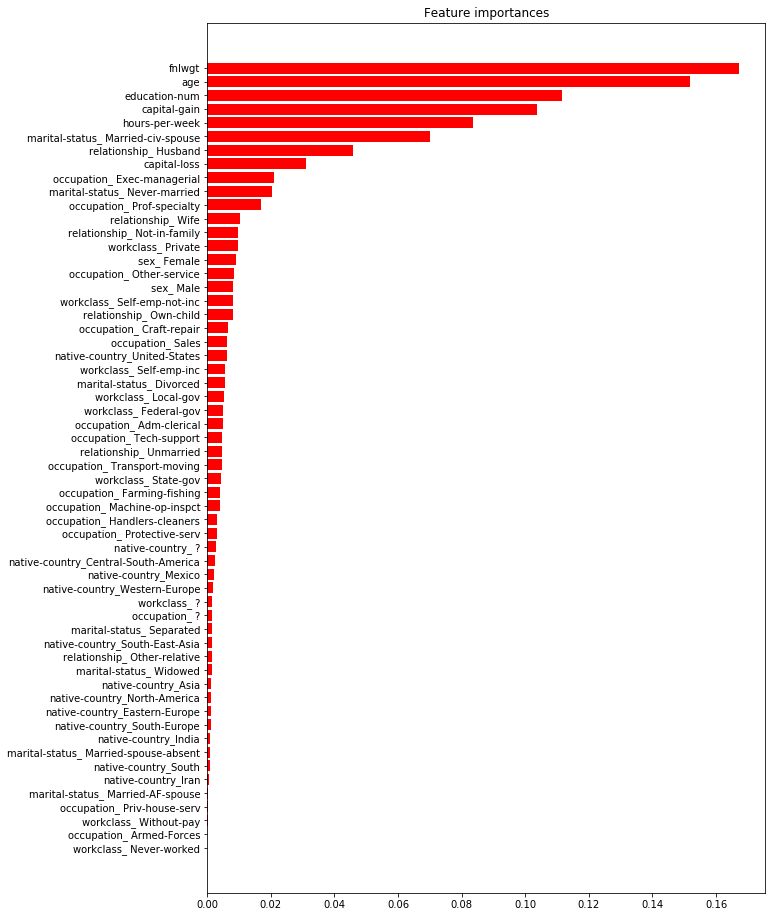

In [251]:
model_countriesregions_fnlwgt_capital_education_norm.fit(X_train, y_train)
importances = model_countriesregions_fnlwgt_capital_education_norm.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

# 9. Marital status & Relationship

husband and wife -> spouse

0.7917335796094639 0.01219740388019095

In [253]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [254]:
# Preprocessing

# Countries per region
for k, v in countries.items():
    X_train['native-country'] = X_train['native-country'].replace(v, k)
    X_test['native-country'] = X_test['native-country'].replace(v, k)

# Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

X_train['relationship'] = X_train['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')
X_test['relationship'] = X_test['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [255]:
model_countriesregions_fnlwgt_capital_education_spouse = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_countriesregions_fnlwgt_capital_education_spouse = cross_val_score(model_countriesregions_fnlwgt_capital_education_spouse, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital_education_spouse.mean(), cv_score_countriesregions_fnlwgt_capital_education_spouse.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.788, total= 1.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] .................................... , score=0.816, total= 1.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.5min remaining:    0.0s


[CV] .................................... , score=0.786, total= 1.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.7min remaining:    0.0s


[CV] .................................... , score=0.785, total= 1.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.0min remaining:    0.0s


[CV] .................................... , score=0.784, total= 1.3min
0.7917335796094639 0.01219740388019095


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.3min finished


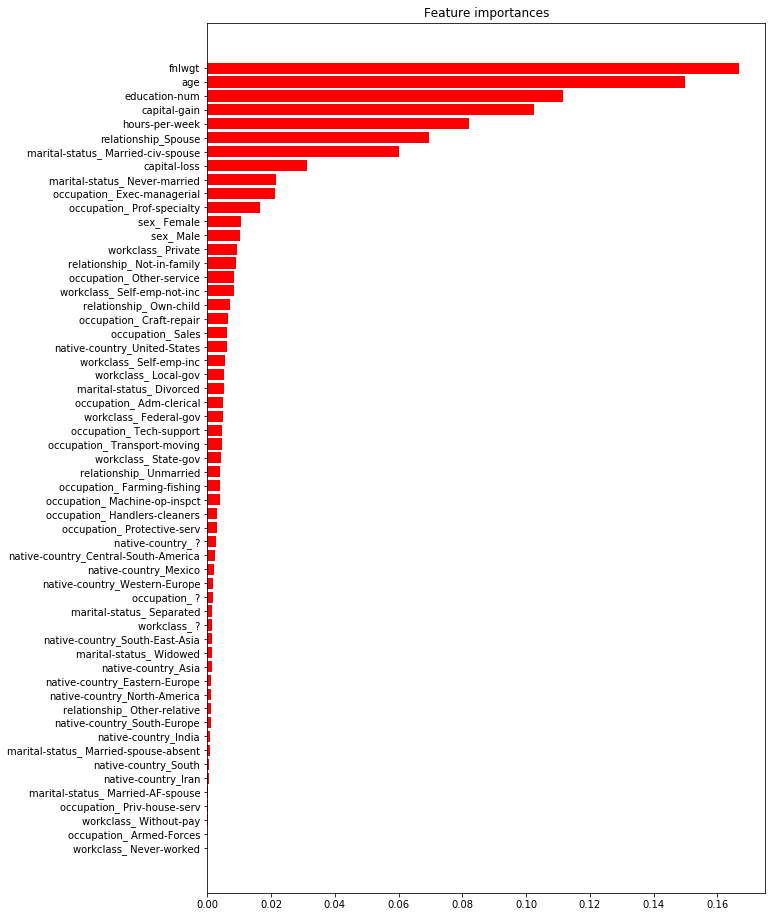

In [256]:
model_countriesregions_fnlwgt_capital_education_spouse.fit(X_train, y_train)
importances = model_countriesregions_fnlwgt_capital_education_spouse.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

# 10. PCA 

In [293]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [294]:
# Preprocessing

new_countries = {
    "United-States": [' United-States'],
    "South-East-Asia": [' Philippines', ' Cambodia' ,' Laos', ' Vietnam', ' Thailand'],
    "North-America": [' Canada'],
    "Mexico": [' Mexico'],
    "Central-South-America": [' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador',
                              ' El-Salvador', ' Guatemala', ' Honduras', ' Jamaica', ' Peru',
                              ' Puerto-Rico', ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)',
                              ' Haiti', ' Nicaragua'],
    "Western-Europe": [' England', ' France', ' Germany', ' Holand-Netherlands',
                       ' Ireland', ' Scotland', ' Italy', ' Portugal'],
    "Eastern-Europe": [' Hungary', ' Greece', ' Yugoslavia', ' Poland'],
    "Asia": [' China', ' Hong', ' Japan', ' Taiwan'],
    "India": [' India'],
    "Iran": [' Iran'],
    "South": [' South'],
}

# Countries per region
for k, v in new_countries.items():
    X_train['native-country'] = X_train['native-country'].replace(v, k)
    X_test['native-country'] = X_test['native-country'].replace(v, k)

# Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

X_train['relationship'] = X_train['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')
X_test['relationship'] = X_test['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


# PCA 
X_train_norm = StandardScaler().fit_transform(X_train)  # standadize before PCA

pca = PCA(random_state=0)
pca.fit(X_train_norm)
principalComponents = pca.transform(X_train_norm)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


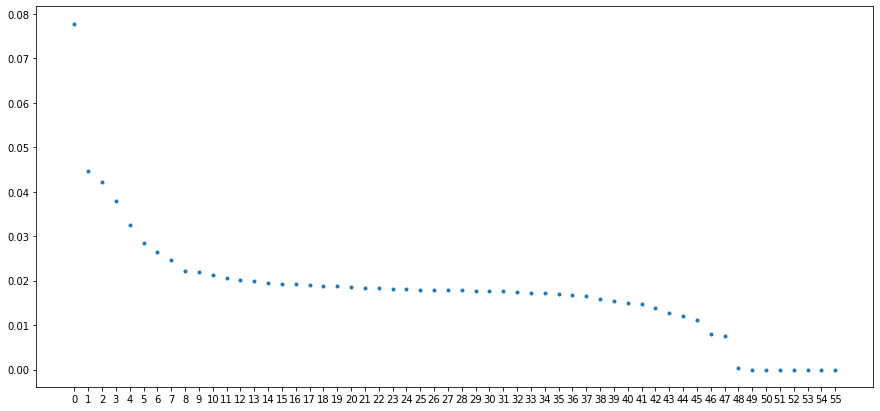

In [301]:
# Visualise PC compoents
plt.figure(figsize=(15,7))
plt.plot(pca.explained_variance_ratio_, '.')
plt.xticks(np.arange(len(pca.explained_variance_ratio_)), np.arange(len(pca.explained_variance_ratio_)))
plt.show()

In [303]:
model_countriesregions_fnlwgt_capital_education_spouse_PCA = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_countriesregions_fnlwgt_capital_education_spouse_PCA = cross_val_score(model_countriesregions_fnlwgt_capital_education_spouse_PCA, principalComponents[:, :48], y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital_education_spouse_PCA.mean(), cv_score_countriesregions_fnlwgt_capital_education_spouse_PCA.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.762, total= 5.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.9min remaining:    0.0s


[CV] .................................... , score=0.783, total= 5.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 11.5min remaining:    0.0s


[CV] .................................... , score=0.762, total= 6.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 17.6min remaining:    0.0s


[CV] .................................... , score=0.757, total= 6.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 23.6min remaining:    0.0s


[CV] .................................... , score=0.748, total= 6.0min
0.7625306298321244 0.0115488717720629


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 29.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 29.6min finished


# 11. Marital status: married VS not married

In [339]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [340]:
# Preprocessing

marital = {
    "married": [' Married-civ-spouse', ' Married-AF-spouse', ' Married-spouse-absent'],
    "never-married": [ ' Never-married'],
    "not-married": [' Divorced', ' Separated', ' Widowed']
}

# Countries per region
for k, v in marital.items():
    X_train['marital-status'] = X_train['marital-status'].replace(v, k)
    X_test['marital-status'] = X_test['marital-status'].replace(v, k)

new_countries = {
    "United-States": [' United-States'],
    "South-East-Asia": [' Philippines', ' Cambodia' ,' Laos', ' Vietnam', ' Thailand'],
    "North-America": [' Canada'],
    "Mexico": [' Mexico'],
    "Central-South-America": [' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador',
                              ' El-Salvador', ' Guatemala', ' Honduras', ' Jamaica', ' Peru',
                              ' Puerto-Rico', ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)',
                              ' Haiti', ' Nicaragua'],
    "Western-Europe": [' England', ' France', ' Germany', ' Holand-Netherlands',
                       ' Ireland', ' Scotland', ' Italy', ' Portugal'],
    "Eastern-Europe": [' Hungary', ' Greece', ' Yugoslavia', ' Poland'],
    "Asia": [' China', ' Hong', ' Japan', ' Taiwan'],
    "India": [' India'],
    "Iran": [' Iran'],
    "South": [' South'],
}

# Countries per region
for k, v in new_countries.items():
    X_train['native-country'] = X_train['native-country'].replace(v, k)
    X_test['native-country'] = X_test['native-country'].replace(v, k)

# Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

X_train['relationship'] = X_train['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')
X_test['relationship'] = X_test['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [338]:
X_train.groupby(["marital-status", "relationship"]).size()

marital-status       relationship   
 Married-civ-spouse   Not-in-family        11
                      Other-relative       92
                      Own-child            75
                     Spouse             11045
married               Not-in-family       154
                      Other-relative       26
                      Own-child            29
                      Unmarried            92
                     Spouse                17
never-married         Not-in-family      3539
                      Other-relative      501
                      Own-child          3395
                      Unmarried           688
not-married           Not-in-family      2519
                      Other-relative      165
                      Own-child           314
                      Unmarried          1759
dtype: int64

In [341]:
model_countriesregions_fnlwgt_capital_education_spouse_marital = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_countriesregions_fnlwgt_capital_education_spouse_marital = cross_val_score(model_countriesregions_fnlwgt_capital_education_spouse_marital, principalComponents[:, :48], y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital_education_spouse_marital.mean(), cv_score_countriesregions_fnlwgt_capital_education_spouse_marital.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.762, total= 5.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.8min remaining:    0.0s


[CV] .................................... , score=0.783, total= 5.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 11.7min remaining:    0.0s


[CV] .................................... , score=0.762, total= 6.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 18.4min remaining:    0.0s


[CV] .................................... , score=0.757, total= 6.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 24.4min remaining:    0.0s


[CV] .................................... , score=0.748, total= 6.1min
0.7625306298321244 0.0115488717720629


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 30.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 30.6min finished


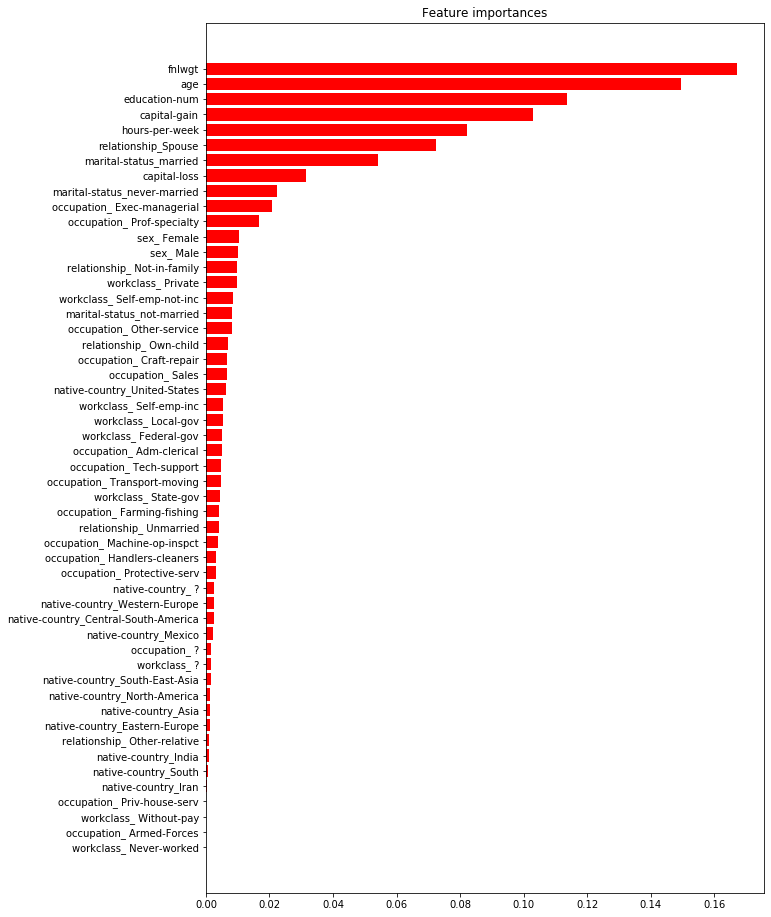

In [342]:
model_countriesregions_fnlwgt_capital_education_spouse_marital.fit(X_train, y_train)
importances = model_countriesregions_fnlwgt_capital_education_spouse_marital.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

# 12. Job -> unemployed

In [358]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [359]:
# Preprocessing

X_train['workclass'][X_train['workclass'] == " Never-worked"] = "Unemployed"
X_train['workclass'][X_train['workclass'] == " Without-pay"] = "Unemployed"

# Countries per region
new_countries = {
    "United-States": [' United-States'],
    "South-East-Asia": [' Philippines', ' Cambodia' ,' Laos', ' Vietnam', ' Thailand'],
    "North-America": [' Canada'],
    "Mexico": [' Mexico'],
    "Central-South-America": [' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador',
                              ' El-Salvador', ' Guatemala', ' Honduras', ' Jamaica', ' Peru',
                              ' Puerto-Rico', ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)',
                              ' Haiti', ' Nicaragua'],
    "Western-Europe": [' England', ' France', ' Germany', ' Holand-Netherlands',
                       ' Ireland', ' Scotland', ' Italy', ' Portugal'],
    "Eastern-Europe": [' Hungary', ' Greece', ' Yugoslavia', ' Poland'],
    "Asia": [' China', ' Hong', ' Japan', ' Taiwan'],
    "India": [' India'],
    "Iran": [' Iran'],
    "South": [' South'],
}

# Countries per region
for k, v in new_countries.items():
    X_train['native-country'] = X_train['native-country'].replace(v, k)
    X_test['native-country'] = X_test['native-country'].replace(v, k)

# Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

X_train['relationship'] = X_train['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')
X_test['relationship'] = X_test['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [360]:
model_countriesregions_fnlwgt_capital_education_spouse_job = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_countriesregions_fnlwgt_capital_education_spouse_job = cross_val_score(model_countriesregions_fnlwgt_capital_education_spouse_job, principalComponents[:, :48], y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital_education_spouse_job.mean(), cv_score_countriesregions_fnlwgt_capital_education_spouse_job.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.762, total= 5.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.8min remaining:    0.0s


[CV] .................................... , score=0.783, total= 6.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 11.8min remaining:    0.0s


[CV] .................................... , score=0.762, total= 6.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 18.0min remaining:    0.0s


[CV] .................................... , score=0.757, total= 6.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 24.3min remaining:    0.0s


[CV] .................................... , score=0.748, total= 5.8min
0.7625306298321244 0.0115488717720629


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 30.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 30.1min finished


# Select K-best

In [397]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [398]:
# Preprocessing

# Countries per region
new_countries = {
    "United-States": [' United-States'],
    "South-East-Asia": [' Philippines', ' Cambodia' ,' Laos', ' Vietnam', ' Thailand'],
    "North-America": [' Canada'],
    "Mexico": [' Mexico'],
    "Central-South-America": [' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador',
                              ' El-Salvador', ' Guatemala', ' Honduras', ' Jamaica', ' Peru',
                              ' Puerto-Rico', ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)',
                              ' Haiti', ' Nicaragua'],
    "Western-Europe": [' England', ' France', ' Germany', ' Holand-Netherlands',
                       ' Ireland', ' Scotland', ' Italy', ' Portugal'],
    "Eastern-Europe": [' Hungary', ' Greece', ' Yugoslavia', ' Poland'],
    "Asia": [' China', ' Hong', ' Japan', ' Taiwan'],
    "India": [' India'],
    "Iran": [' Iran'],
    "South": [' South'],
}

# Countries per region
for k, v in new_countries.items():
    X_train['native-country'] = X_train['native-country'].replace(v, k)
    X_test['native-country'] = X_test['native-country'].replace(v, k)

# Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

X_train['relationship'] = X_train['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')
X_test['relationship'] = X_test['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

features = X_train.columns

# Select K best
select = SelectKBest(k=50)
X_train = select.fit_transform(X_train, y_train)
X_test = select.transform(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [401]:
selected_features = features[select.get_support()]
X_train = pd.DataFrame(X_train, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

In [402]:
model_countriesregions_fnlwgt_capital_education_spouse_Kbest = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_countriesregions_fnlwgt_capital_education_spouse_Kbest = cross_val_score(model_countriesregions_fnlwgt_capital_education_spouse_Kbest, principalComponents[:, :48], y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital_education_spouse_Kbest.mean(), cv_score_countriesregions_fnlwgt_capital_education_spouse_Kbest.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.762, total= 6.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.1min remaining:    0.0s


[CV] .................................... , score=0.783, total= 6.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 12.1min remaining:    0.0s


[CV] .................................... , score=0.762, total= 5.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 17.8min remaining:    0.0s


[CV] .................................... , score=0.757, total= 5.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 23.3min remaining:    0.0s


[CV] .................................... , score=0.748, total= 5.8min
0.7625306298321244 0.0115488717720629


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 29.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 29.2min finished


In [403]:
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))
X_test.shape

(24421, 13)

In [404]:
X_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,23,Private,32732,Some-college,10,Married-civ-spouse,Sales,Husband,Male,0,0,25,United-States
1,69,Private,165017,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,Male,2538,0,40,United-States
2,27,Private,36440,Bachelors,13,Never-married,Sales,Not-in-family,Female,0,0,40,United-States
3,40,Private,182217,Some-college,10,Married-civ-spouse,Other-service,Wife,Female,0,0,40,Scotland
4,24,Private,89347,11th,7,Never-married,Machine-op-inspct,Not-in-family,Female,0,0,40,United-States
